In [19]:
# Importación de pandas para traspasar el dataset de CSV a dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_Train_clean = pd.read_csv('df_Train_clean_v3.csv')
df_step_0 = df_Train_clean
df_step_0

,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,0,3.0,0.119261
1,0,4.0,0.056427
2,0,1.0,0.068620
3,1,3.0,0.118696
4,0,1.0,0.208613
...,...,...,...
5348,1,3.0,0.209643
5349,1,3.0,0.081110
5350,0,4.0,0.209679
5351,0,2.0,0.178224


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = df_step_0

# Separar características y objetivo
X = df.drop('Attrition_rate', axis=1)

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# columnas_a_escalar = X.columns
# X[columnas_a_escalar] = scaler.fit_transform(X[columnas_a_escalar])

y = df['Attrition_rate']

# Supongamos que tienes las variables predictoras en X y la variable objetivo en y
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 0.0029801087263566887
R^2: -0.0007840810714709878


El  modelo no es bueno en cuanto a R^2, por lo que es necesario revisar los datos de entrada.

In [21]:
# Crear un DataFrame con los valores reales y predichos
resultados = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Predicho': y_pred
})

# Mostrar las primeras filas del DataFrame de resultados
print(resultados.head())

      Valor Real  Valor Predicho
5010    0.077206        0.099860
1650    0.069774        0.100643
401     0.134936        0.101294
4222    0.164783        0.102011
1684    0.007734        0.102011


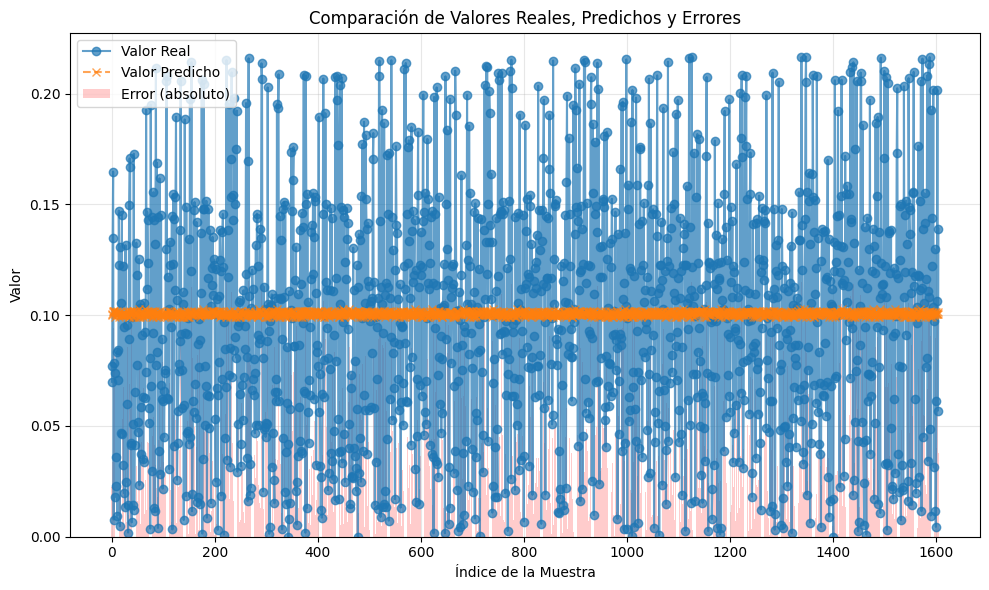

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes los valores reales y predichos
# y_test: valores reales
# y_pred: valores predichos

# Calcular los errores
errores = np.abs(y_test - y_pred)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valor Real', marker='o', linestyle='-', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Valor Predicho', marker='x', linestyle='--', alpha=0.7)
plt.bar(range(len(errores)), errores, color='red', alpha=0.2, label='Error (absoluto)')

# Etiquetas y leyenda
plt.title('Comparación de Valores Reales, Predichos y Errores')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

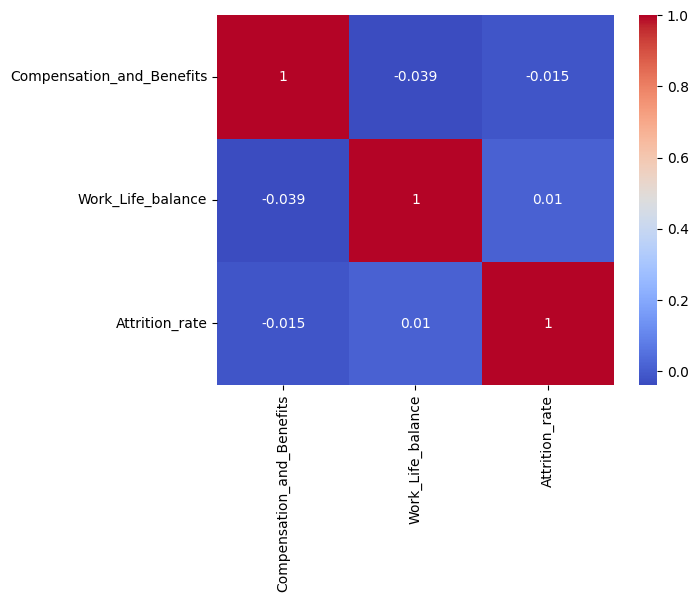

In [23]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

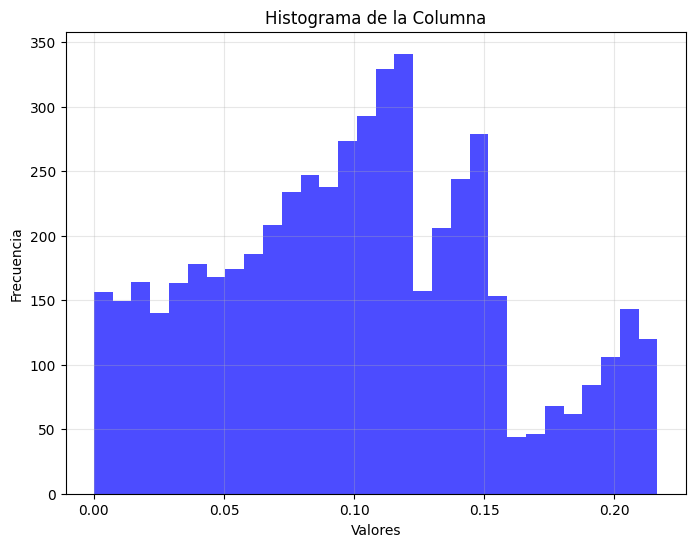

In [24]:
import matplotlib.pyplot as plt

# Supongamos que 'columna' es el nombre de tu columna en el DataFrame
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, color='blue', alpha=0.7)
plt.title('Histograma de la Columna')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

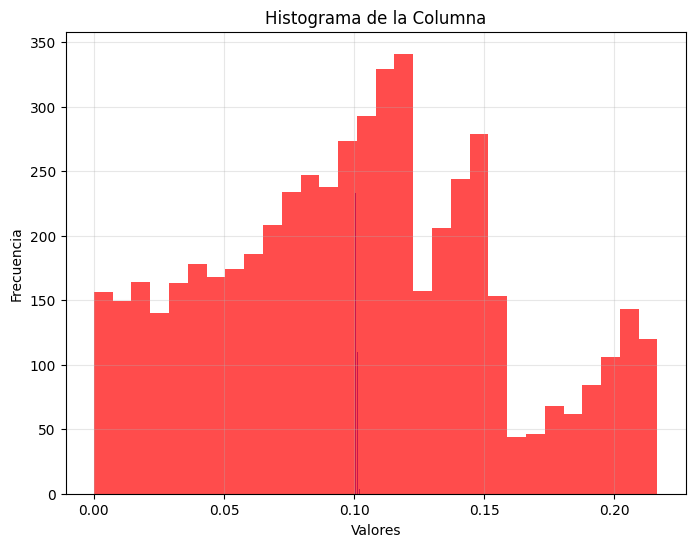

In [25]:
import matplotlib.pyplot as plt

# Supongamos que 'columna' es el nombre de tu columna en el DataFrame
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=30, color='blue', alpha=0.7)
plt.hist(y, bins=30, color='red', alpha=0.7)
plt.title('Histograma de la Columna')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()